<a href="https://colab.research.google.com/github/CJGS4L/stat/blob/main/6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

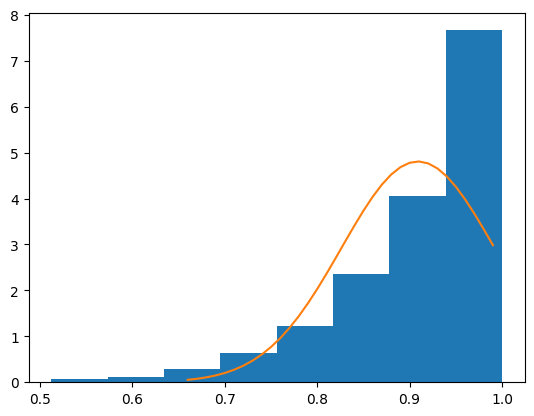

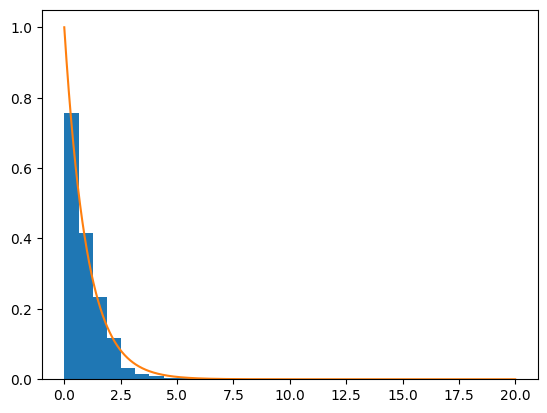

In [ ]:
import numpy as np
import math
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import statistics as st

# 1 (a)
theta = 1
n=10
#EX = (theta**2)/(n+2)
#dX = math.sqrt((theta**3)/(n+3) - (theta**4)/((n+2)**2))

list_X_n = []
#for i in range(n):
#  list_X_n.append(((list_prob[i])**(1/n))*(theta))

#plt.hist(list_X_n, bins = 20)

for i in range(1000):
  list_prob = np.random.uniform(0,theta,size=n)
  list_X_n.append(max(list_prob))

plt.hist(list_X_n , density = True, bins = 8)

x = np.arange((theta*n)/(n+1)-3*(math.sqrt((theta**2)*n/(n+2) - ((theta*n)/(n+1))**2)), theta, 0.01)
plt.plot(x, ss.norm.pdf(x, (theta*n)/(n+1), math.sqrt((theta**2)*n/(n+2) - ((theta*n)/(n+1))**2)))
#plt.xlim((theta*n)/(n+1)-3*(math.sqrt((theta**2)*n/(n+2) - ((theta*n)/(n+1))**2)), (theta*n)/(n+1) + 3*(math.sqrt((theta**2)*n/(n+2) - ((theta*n)/(n+1))**2)))
plt.show()


# 1 (b) #
list_X_n_1 = []
for i in range(1000):
  list_prob = np.random.uniform(0,theta,size=n)
  list_X_n_1.append(n*(theta - max(list_prob)))
plt.hist(list_X_n_1, density = True)
x_1 = np.arange(0, 20, 0.01)
plt.plot(x_1, ss.expon.pdf(x_1))

In [ ]:
#1d#
n = 10
k=0
l=0
theta = 10
list_X_n = []
list_es_1 = [] #max mlt cf#
list_es_2 = [] #double mean#
for i in range(1000):
  list_X_n = np.random.uniform(0,theta,size=n)
  list_es_1.append(max(list_X_n)*((n+1)/n))
  list_es_2.append(sum(list_X_n)*2/n)
for i in range(1000):
  if(abs(theta - list_es_1[i])>abs(theta - list_es_2[i])):
    l+=1
  else:
    k+=1
print("X(n)*(n+1)/n was close", k, "times")
print("2*mean(X) was close", l, "times")



X(n)*(n+1)/n was close 746 times
2*mean(X) was close 254 times


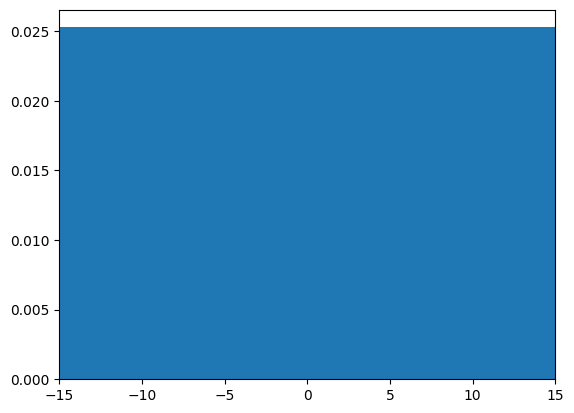

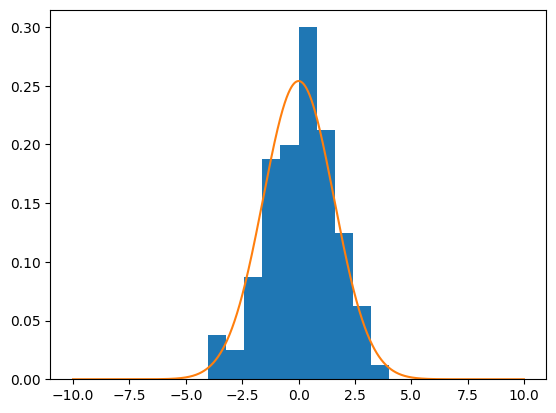

In [ ]:
#2#
n = 1000
theta = 1
list_cauchy_1 = []
list_cauchy_2 = []
for i in range(100):
  list_cauchy_1.append((sum(ss.cauchy.rvs(loc = theta, scale = 1, size = n)))/n)
plt.hist(list_cauchy_1, density = True) #no Var doesn't conv to 0#
plt.xlim(-15, 15)
plt.show()

for i in range(100):
  list_cauchy_2.append(math.sqrt(n)*((st.median(ss.cauchy.rvs(loc = theta, scale = 1, size = n)))-theta))
plt.hist(list_cauchy_2, density = True)
x = np.arange(-10, 10, 0.01)
plt.plot(x, ss.norm.pdf(x, 0, math.sqrt(1/(4*(ss.cauchy.pdf( theta, loc = theta, scale = 1))**2)))) # Var - ?



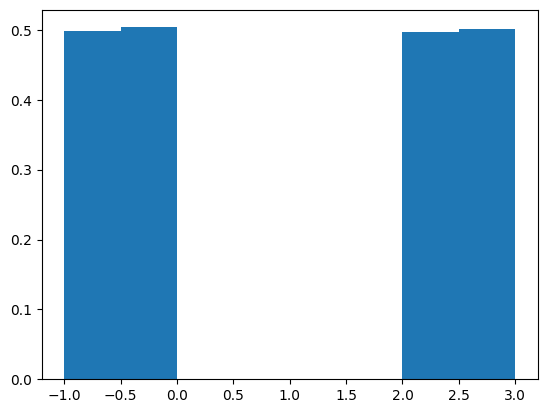

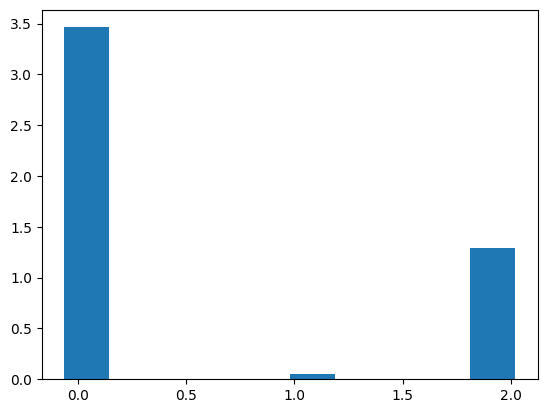

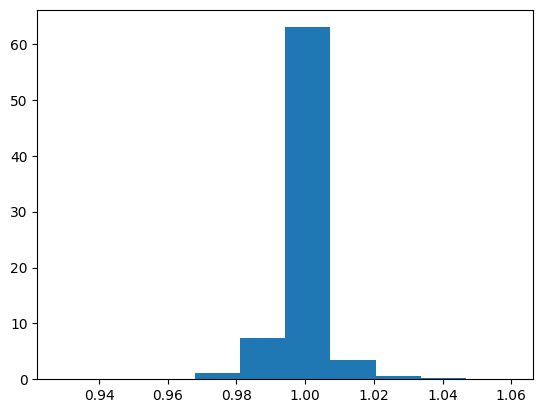

In [ ]:
#3#
theta = 1
n = 100
list_x_n = []
list_med = []
list_trim_mean = []
alpha = 0.1

for i in range(1000):
  for i in range(n):
    if(np.random.binomial(1, 0.5) == 0):
      list_x_n.append(np.random.uniform(theta - 2, theta - 1))
    else :
      list_x_n.append(np.random.uniform(theta + 1, theta + 2))
  list_med.append(st.median(list_x_n))
  list_trim_mean.append(ss.trim_mean(list_x_n, alpha))
plt.hist(list_x_n, density = True, bins = 8)
plt.show()
plt.hist(list_med,  density = True)
plt.show()
plt.hist(list_trim_mean,  density = True)
plt.show()



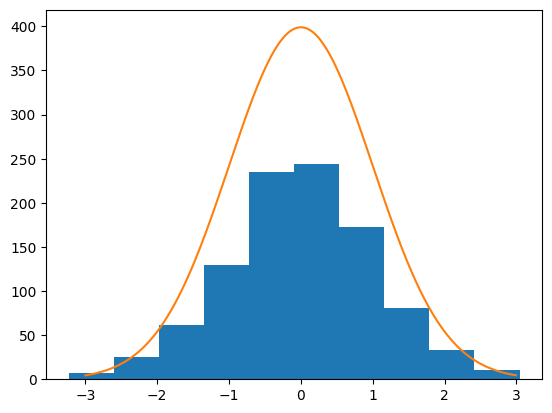

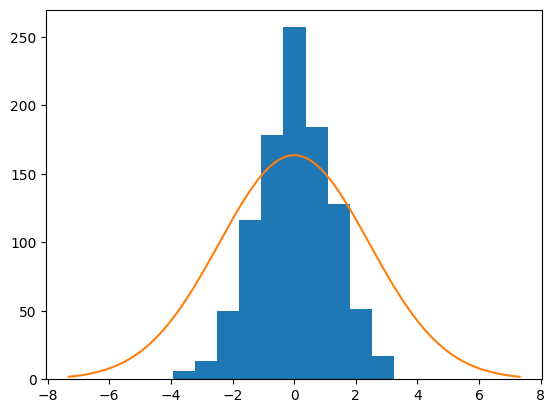

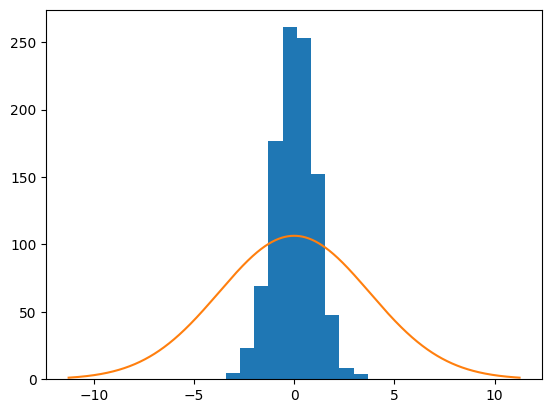

inf


<ipython-input-78-1c32cceb4da6>:47: RuntimeWarning: invalid value encountered in double_scalars
  var = (2/(1-2*alpha)**2)*(int1+alpha*q**2)


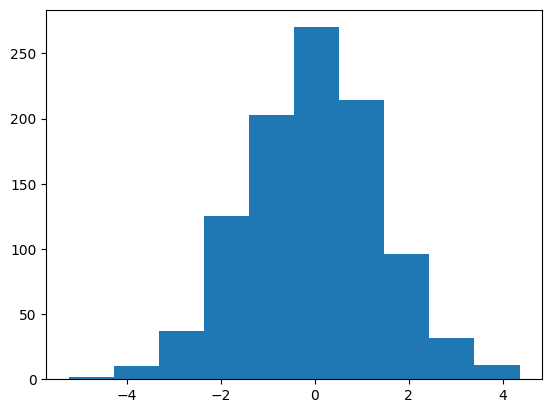

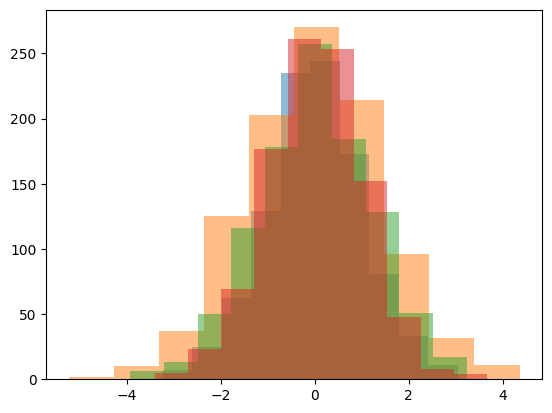

In [ ]:
  #5#
from scipy.integrate import quad
n = 1000
x = np.arange(-3, 3, 0.01)
mu = 1
b = 1
#median#
Med = []
q = ss.laplace(mu, b).ppf(0.5)
for i in range(n):
  Med.append(math.sqrt(n)*(st.median(np.random.laplace(mu, b, size = n))-1))
plt.hist(Med)
plt.plot(x, n*ss.norm.pdf(x, 0, math.sqrt(1/(4*(ss.laplace.pdf(q,mu, b))**2))))
plt.show()
#0.1 mean#
Mean_1 = []
alpha_1 = 0.1
q1 = ss.laplace(mu, b).ppf(1-alpha_1)
int1 = 1.2228
for i in range(n):
  Mean_1.append(math.sqrt(n)*(ss.trim_mean(np.random.laplace(mu, b, size = n),alpha_1)-mu))
var1 = (2/(1-2*alpha_1)**2)*(int1+alpha_1*q1**2)
x1 = np.arange(-3*math.sqrt(var1), 3*math.sqrt(var1), 0.01)
plt.hist(Mean_1)
plt.plot(x1, n*ss.norm.pdf(x1, 0, math.sqrt(var1)))
plt.show()
#0.3 mean#
Mean_2 = []
alpha_2 = 0.3
q2 = ss.laplace(mu, b).ppf(1-alpha_2)
int2 = 0.44
for i in range(n):
  Mean_2.append(math.sqrt(n)*(ss.trim_mean(np.random.laplace(mu, b, size = n),alpha_2)-mu))
var2 = (2/(1-2*alpha_2)**2)*(int2+alpha_2*q2**2)
x2 = np.arange(-3*math.sqrt(var2), 3*math.sqrt(var2), 0.01)
plt.hist(Mean_2)
plt.plot(x2, n*ss.norm.pdf(x2, 0, math.sqrt(var2)))
plt.show()
#mean#
Mean = []
alpha = 0
q = ss.laplace(mu, b).ppf(1-alpha)
print(q)
#int_m =
for i in range(n):
  Mean.append(math.sqrt(n)*(ss.trim_mean(np.random.laplace(mu, b, size = n),alpha)-mu))
var = (2/(1-2*alpha)**2)*(int1+alpha*q**2)
#x = np.arange(-3*math.sqrt(var), 3*math.sqrt(var), 0.01)
plt.hist(Mean)
plt.plot(x, n*ss.norm.pdf(x, 0, math.sqrt(var)))
plt.show()

plt.hist(Med, alpha = 0.5)
plt.hist(Mean, alpha = 0.5)
plt.hist(Mean_1, alpha = 0.5)
plt.hist(Mean_2, alpha = 0.5)
plt.show()
